In [247]:
import seaborn as sns
import pandas as pd

In [248]:
data = pd.DataFrame({
    "n":[1,2,3,4,5,6,7],
    "Германия (км/ч)":[180.30, 230.00, 130.67, 299.99, 164.21, 283.29, 110.12],
    "Украина(км/ч)": [83.42, 110.01, 68.00, 130.00, 51.00, 90.00, 96.22],
    "Чехия(км/ч)": [160.00, 143.2, 120.7, 155.32, 112.3, 93.2, 132.2]
})
n = data.shape[0]

data

,n,Германия (км/ч),Украина(км/ч),Чехия(км/ч)
0,1,180.30,83.42,160.00
1,2,230.00,110.01,143.20
2,3,130.67,68.00,120.70
3,4,299.99,130.00,155.32
4,5,164.21,51.00,112.30
5,6,283.29,90.00,93.20
6,7,110.12,96.22,132.20


<h3>1. Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).</h3>

In [249]:
data_data = pd.DataFrame({
    "Название": ["Среднее отклонение","Стандартное отклонение"],
    "Германия":[sum(data.iloc[:,1]/n), data.iloc[:,1].std()],
    "Украина":[sum(data.iloc[:,2]/n), data.iloc[:,2].std()],
    "Чехия": [sum(data.iloc[:,3]/n), data.iloc[:,3].std()]
})
data_data

,Название,Германия,Украина,Чехия
0,Среднее отклонение,199.797143,89.807143,130.988571
1,Стандартное отклонение,73.472232,26.099568,24.039417


<h3>2. Побудувати графік розкиду в групах.</h3>

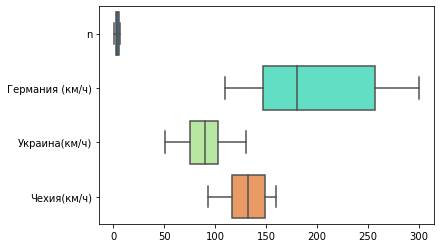

In [250]:
sns.boxplot(data=data, palette='rainbow', orient='h')

In [251]:

data.loc[data.shape[0]+1] = ["Сума: ",sum(data.iloc[:,1]), sum(data.iloc[:,2]), sum(data.iloc[:,3])]
data.loc[data.shape[0]+1] = ["Середні: ", round(data.iloc[n,1]/n, 2), round(data.iloc[n,2]/n, 2), round(data.iloc[n,3]/n, 2)]
n = data.shape[0]
data

,n,Германия (км/ч),Украина(км/ч),Чехия(км/ч)
0,1,180.30,83.42,160.00
1,2,230.00,110.01,143.20
2,3,130.67,68.00,120.70
3,4,299.99,130.00,155.32
4,5,164.21,51.00,112.30
5,6,283.29,90.00,93.20
6,7,110.12,96.22,132.20
8,Сума:,1398.58,628.65,916.92
9,Середні:,199.80,89.81,130.99


In [252]:
summa = sum(data.iloc[n-2, 1:])
print("Загальна сума: ", summa)
data

Загальна сума:  2944.15


,n,Германия (км/ч),Украина(км/ч),Чехия(км/ч)
0,1,180.30,83.42,160.00
1,2,230.00,110.01,143.20
2,3,130.67,68.00,120.70
3,4,299.99,130.00,155.32
4,5,164.21,51.00,112.30
5,6,283.29,90.00,93.20
6,7,110.12,96.22,132.20
8,Сума:,1398.58,628.65,916.92
9,Середні:,199.80,89.81,130.99


<h3>3. Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.</h3>

In [259]:
def dispers(data, n):    
    first_sum = data.iloc[n-2,1]
    second_sum = data.iloc[n-2,2]
    third_sum = data.iloc[n-2, 3]
    Tc2 = first_sum**2 + second_sum**2 + third_sum**2
    c = data.shape[1]-1
    n = data.shape[0]-2
    N = n*c
    sum2 = sum(data.iloc[n, 1:])**2
    constanta = sum2/N
    xi2 = 0
    for i in range(0, n):
        xi2 += data.iloc[i, 1]**2
    for i in range(0, n):
        xi2 += data.iloc[i, 2]**2
    for i in range(0, n):
        xi2 += data.iloc[i, 3]**2
    
    SSfact = Tc2/n - constanta
    print("SSфактичне:", SSfact)
    SSzag = xi2 - sum2/N
    print("SSзагальне:", SSzag)
    SSvip = SSzag - SSfact
    print("SSвипадкове:", SSvip)
    
    dfact = c - 1
    print("\ndфактичне:", dfact)
    dzag = N - 1
    print("dзагальне:", dzag)
    dvip = dzag - dfact
    print("dвипадкове:", dvip)
    
    MSfact = SSfact/dfact
    print("\nMSфактичне:", MSfact)
    MSvip = SSvip/dvip
    print("MSвипадкове:", MSvip)
    
    Femp = MSfact/MSvip
    print("\nFемпіричне", Femp)
    Fcrit = pd.read_excel("Таблиця критичних значень для критерію Фішера.xlsx").iloc[dzag-2, dfact]
    if (Fcrit >= Femp):
        print("Рівність середніх підтверджена", Fcrit, ">", Femp)
    else:
        print("Рівність середніх не підтверджена", Fcrit, "<", Femp)
    
    data_end = pd.DataFrame({
        "Назва":["Фактичне", "Випадкове", "Загальне"],
        "SS":[SSfact, SSvip, SSzag],
        "d":[dfact, dvip, dzag],
        "MS":[MSfact, MSvip, None]
    })
    return data_end

<h3>4.Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.</h3>

<h3>5. Перевірити результат роботи функції на реальних або сгенерованих даних. Зробити висновок</h3>

In [260]:
dispers(data, n)

SSфактичне: 43232.76920952374
SSзагальне: 83176.26878095232
SSвипадкове: 39943.499571428576

dфактичне: 2
dзагальне: 20
dвипадкове: 18

MSфактичне: 21616.38460476187
MSвипадкове: 2219.08330952381

Fемпіричне 9.741132526205382
Рівність середніх не підтверджена 3.5 < 9.741132526205382


,Назва,SS,d,MS
0,Фактичне,43232.769210,2,21616.384605
1,Випадкове,39943.499571,18,2219.083310
2,Загальне,83176.268781,20,NaN
